<a href="https://colab.research.google.com/github/24102628DuongThuyTien/AI-Assignment1/blob/main/%5BAI2025%20Assignment%5D%20CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [1]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [2]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

cifar10 = tf.keras.datasets.cifar10

# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
# Data Augmentation to improve generalization
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train)

# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [6]:
model = tf.keras.models.Sequential([

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    # Conv Layer 2
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    # Conv Layer 3
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    # Flatten and Fully Connected Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    #Output Layer
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile and Train neural network

In [7]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=50, validation_data=(x_test, y_test)
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.2890 - loss: 2.1445 - val_accuracy: 0.4058 - val_loss: 1.7325
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.3955 - loss: 1.6557 - val_accuracy: 0.4505 - val_loss: 1.5831
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.4256 - loss: 1.5892 - val_accuracy: 0.4489 - val_loss: 1.5741
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.4399 - loss: 1.5561 - val_accuracy: 0.4652 - val_loss: 1.5346
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.4569 - loss: 1.5222 - val_accuracy: 0.4855 - val_loss: 1.4805
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.4643 - loss: 1.5007 - val_accuracy: 0.5022 - val_loss: 1.4329
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.4709 - loss: 1.4778 - val_accuracy: 0.4779 - val_loss: 1.5224
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.4736 - loss: 1.4738 - val_accurac

## Evaluate neural network performance


In [13]:
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy:", accuracy)

313/313 - 1s - 2ms/step - accuracy: 0.5353 - loss: 1.3921
Test Accuracy: 0.5353000164031982


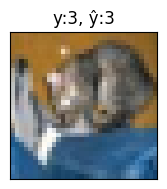

In [12]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)
fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    true_label = tf.argmax(y_test[i]).numpy()
    pred_label = pred[i].numpy()
    title_str = f"y:{true_label}, ŷ:{pred_label}"
    subplot.set_title(title_str)
    subplot.imshow(x_test[i])
    plt.show()

In [10]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.5353000164031982
